# **Servo Prediction using Linear regression**

**Objective**-The objective of this linear regression model is to predict the performance class of a servo mechanism based on its characteristics. Specifically, the model aims to estimate the continuous target variable (Class) using the features such as Motor, Screw, Pgain, Vgain.

By building this model, you aim to understand how different factors (motor type, screw type, Pgain, Vgain) influence the performance class of servo mechanisms

**Data Source**- Ybi foundation dataset

**Import library**- Pandas, numpy, train test split, matplot, metrics

In [ ]:
import pandas as pd


In [ ]:
import numpy as np

**Import Data**

In [ ]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')
df

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6
...,...,...,...,...,...
162,B,C,3,2,44
163,B,E,3,1,40
164,C,D,4,3,25
165,A,B,3,2,44


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


**Describe the Data**

In [ ]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [ ]:
df.shape

(167, 5)

In [ ]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [ ]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [ ]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [ ]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

In [ ]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4},'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}}, inplace=True)

**Define Target Variable y and Feature Variables**

In [ ]:
y = df['Class']

In [ ]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [ ]:
x = df[['Motor','Screw','Pgain','Vgain']]

In [ ]:
x.shape

(167, 4)

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.70, random_state=2529)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((116, 4), (51, 4), (116,), (51,))

**Modeling**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(x_train, y_train)

LinearRegression()

**Model prediction**

In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

**Predicting the Model**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [ ]:
mean_squared_error(y_test, y_pred)

66.03589175595563

In [ ]:
mean_absolute_error(y_test, y_pred)

7.190539677251235

In [ ]:
r2_score(y_test,y_pred)

0.6807245170563927

**Visualistion of actual Vs predicted result**




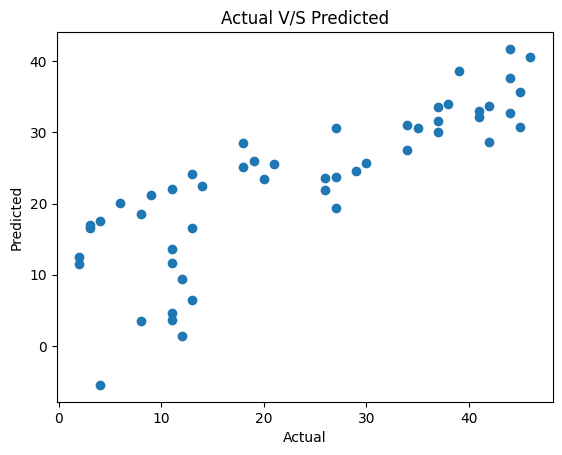

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual V/S Predicted")
plt.show()


# ***Get Future Prediction***

Lets select a random sample from the existing dataset as new value

 Steps to follow

 1 Extract Random raw using sample function

 2 Seperate X and Y

 3 Standardise X

 4 Predict X

In [ ]:
x_new = df.sample(1)
x_new

,Motor,Screw,Pgain,Vgain,Class
58,4,0,3,2,50


In [ ]:
x_new.shape

(1, 5)

In [ ]:
x_new = x_new.drop('Class',axis=1)
x_new

,Motor,Screw,Pgain,Vgain
58,4,0,3,2


In [ ]:
x_new.shape

(1, 4)

In [ ]:
y_pred_new = reg.predict(x_new)
y_pred_new

array([36.51759645])

After predicting the model squared difference between the actual and predicted values is 66.03589175595563.



Explaination-

The insights gained from the model can be used for:

Performance Prediction: Accurately predicting the class of a servo mechanism based on its characteristics.

Parameter Optimization: Identifying the optimal settings for Pgain and Vgain to achieve the best performance.

Quality Control: Ensuring servo mechanisms meet desired performance standards by predicting their performance class.

System Behavior Analysis: Understanding the relationships and impact of various features on the performance of servo mechanisms.

Overall, the model helps in improving the design, manufacturing, and maintenance processes of servo mechanisms by providing data-driven predictions and insights.






